¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Proyecto Sprint 11

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
print(df.head())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, usaste una celda independiente para importar las librerías y otra para leer los datos
</div>

In [3]:
df = df.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'event_time',
    'ExpId': 'exp_id'
})

print(df.head())

                event_name              user_id  event_time  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248


In [4]:
print(df.isna().sum())


event_name    0
user_id       0
event_time    0
exp_id        0
dtype: int64


In [5]:
print(df.dtypes)


event_name    object
user_id        int64
event_time     int64
exp_id         int64
dtype: object


In [6]:
df['event_time'] = pd.to_datetime(df['event_time'], unit='s') 

print(df.dtypes)

event_name            object
user_id                int64
event_time    datetime64[ns]
exp_id                 int64
dtype: object


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La columna event_time está en un formato llamado timestamp unix usado por algunos sistemas computacionales, que cuenta los segundos desde el 1 de enero de 1970. En este caso la función por default toma los milisegundos en lugar de segundos, para poder hacer la conversión en segundos debes usar: 

```    
df['fecha'] = pd.to_datetime(df['event_time'], unit='s')    
```
    
Y ahora si podrás obtener fechas correctas.

</div>

In [7]:
df['event_date'] = df['event_time'].dt.date

<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

In [8]:
total_events = len(df)
print('Número total de eventos:', total_events)

Número total de eventos: 244126


In [9]:
unique_users = df['user_id'].nunique()
print('Número total de usuarios únicos:', unique_users)

Número total de usuarios únicos: 7551


In [10]:
average_events_per_user = total_events / unique_users
print('Promedio de eventos por usuario:', average_events_per_user)

Promedio de eventos por usuario: 32.33028737915508


In [11]:
min_date = df['event_time'].min()
max_date = df['event_time'].max()


print('Fecha más antigua:', min_date)
print('Fecha más reciente:', max_date)

Fecha más antigua: 2019-07-25 04:43:36
Fecha más reciente: 2019-08-07 21:15:17


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

¡Muy bien! Se han tratado de manera correcta los datos de fechas.
</div>

Hola! Tengo una duda aqui...por qué la fecha más reciente sigue siendo 1970?

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Revisar el comentario de arriba, como referencia para saber si el cambio ya funciona:

Fecha inicial 2019-08-25

Fecha máxima 2019-08-07
</div>

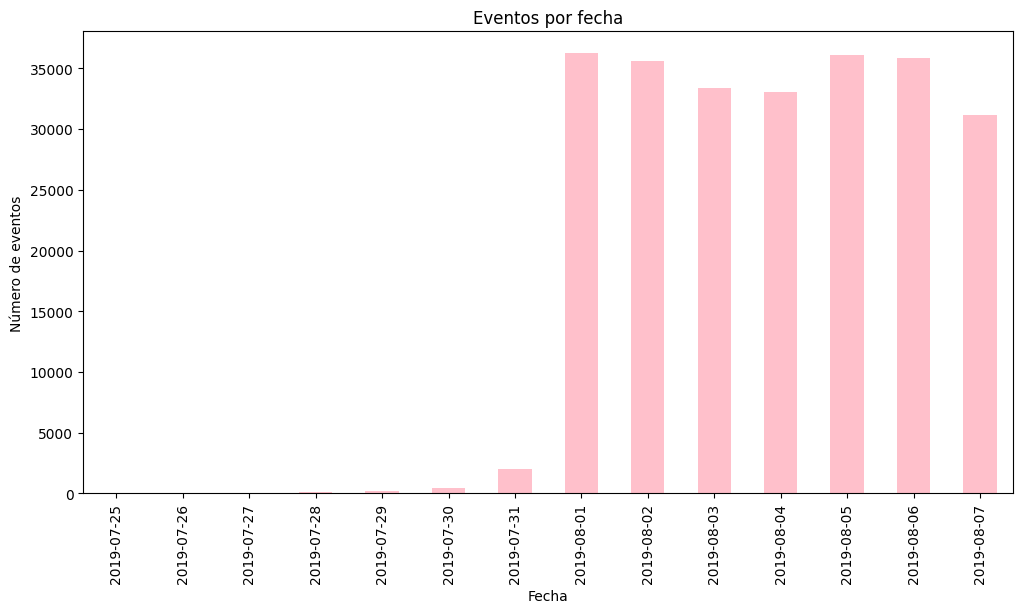

In [12]:
plt.figure(figsize=(12,6))
df['event_date'].value_counts().sort_index().plot(kind='bar', color='pink')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Eventos por fecha')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Buena gráfica, muestra correctamente la distribución de los eventos a lo largo del periodo a probar.
</div>

En esta gr´fica puedo observar que durante los primeros días de la prueba, casi no se registraron eventos, problemente por ajustes o errores técnicos durante los primeros días. Lo mejor es quedarme con los datos desde el 1 de agosto en adelante, así analizo solo el periodo que está comppleto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Buena observación.
</div>

In [13]:
df = df[df['event_time'] >= pd.to_datetime('2019-08-01')]
print('Número de eventos después de filtrar:', len(df))


Número de eventos después de filtrar: 241298


In [14]:
event_counts = df['event_name'].value_counts()
print(event_counts)

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


In [15]:
users_per_event = df.groupby('event_name')['user_id'].nunique().sort_values()
print(users_per_event)

event_name
Tutorial                    840
PaymentScreenSuccessful    3539
CartScreenAppear           3734
OffersScreenAppear         4593
MainScreenAppear           7419
Name: user_id, dtype: int64


In [16]:
proportion_per_event = users_per_event / unique_users
print(proportion_per_event)

event_name
Tutorial                   0.111244
PaymentScreenSuccessful    0.468680
CartScreenAppear           0.494504
OffersScreenAppear         0.608264
MainScreenAppear           0.982519
Name: user_id, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Bien hecho, los conteos y las proporciones de los eventos se han obtenido de manera correcta.
</div>

En este caso vemos como el embudo se va estrechando conforme los usuarios van avanzando a los siguitnes eventos, quedando de la siguinte manera:

Tutorial                   11%
PaymentScreenSuccessful    46%
CartScreenAppear           49%
OffersScreenAppear         60%
MainScreenAppear           98%

Esto significa que solo el 46% (menos de la mitad) llegan hasta el evento de pago.

Proporción en porcentaje de los usuarios que pasaron de una etapa a otra

In [17]:
conversion_offers = users_per_event['OffersScreenAppear'] / users_per_event['MainScreenAppear']
conversion_cart = users_per_event['CartScreenAppear'] / users_per_event['OffersScreenAppear']
conversion_payment = users_per_event['PaymentScreenSuccessful'] / users_per_event['CartScreenAppear']

print('Conversión Main → Offers:', conversion_offers)
print('Conversión Offers → Cart:', conversion_cart)
print('Conversión Cart → Payment:', conversion_payment)


Conversión Main → Offers: 0.6190861302062273
Conversión Offers → Cart: 0.8129762682342695
Conversión Cart → Payment: 0.9477771826459561


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Estan conversiones se calcularon de manera acertada.
</div>

De todos los que entran a la app, el 61% avanza a ver las ofertas
De los que ven las ofertas, el 81% agrega algo al carrito
Y de los que ponen algo en el carrito, el 95% llega a pagar

Casi nadie se pierde al final, la mayor pérdida está entre la pantalla principal y la pantalla de ofertas.

In [18]:
from statsmodels.stats.proportion import proportions_ztest

def compare_groups(event_name, group1, group2):
    users_1 = df[df['exp_id'] == group1]['user_id'].nunique()
    users_2 = df[df['exp_id'] == group2]['user_id'].nunique()

    event_1 = df[(df['exp_id'] == group1) & (df['event_name'] == event_name)]['user_id'].nunique()
    event_2 = df[(df['exp_id'] == group2) & (df['event_name'] == event_name)]['user_id'].nunique()

    counts = [event_1, event_2]
    nobs = [users_1, users_2]

    stat, pval = proportions_ztest(counts, nobs)
    print(f'\nComparación para evento: {event_name}')
    print(f'{group1} → {event_1}/{users_1} = {event_1/users_1:.4f}')
    print(f'{group2} → {event_2}/{users_2} = {event_2/users_2:.4f}')
    print(f'Estadístico z: {stat:.4f}')
    print(f'Valor p: {pval:.4f}')


<div class="alert alert-block alert-warning">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Recuerda realizar todas las importaciones de librerías en la primer celda al inicio del proyecto.
</div>

In [19]:
compare_groups('MainScreenAppear', 246, 248)
compare_groups('OffersScreenAppear', 246, 248)
compare_groups('CartScreenAppear', 246, 248)
compare_groups('PaymentScreenSuccessful', 246, 248)



Comparación para evento: MainScreenAppear
246 → 2450/2484 = 0.9863
248 → 2493/2537 = 0.9827
Estadístico z: 1.0473
Valor p: 0.2950

Comparación para evento: OffersScreenAppear
246 → 1542/2484 = 0.6208
248 → 1531/2537 = 0.6035
Estadístico z: 1.2581
Valor p: 0.2084

Comparación para evento: CartScreenAppear
246 → 1266/2484 = 0.5097
248 → 1230/2537 = 0.4848
Estadístico z: 1.7599
Valor p: 0.0784

Comparación para evento: PaymentScreenSuccessful
246 → 1200/2484 = 0.4831
248 → 1181/2537 = 0.4655
Estadístico z: 1.2474
Valor p: 0.2123


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

¡Bien hecho! Las pruebas de hipótesis se realizaron de manera adecuada, además me gustó que todo lo hiciste con una función esto ayuda a reducir bastantes líneas de código y a estandarizar el trabajo.
</div>

No se observaron diferencias estadísticamente significativas en la participación de los usuarios entre el grupo que recibió la fuente nueva y el grupo que mantuvo la fuente antigua.
 Esto sugiere que el cambio de tipo de letra no tuvo un impacto negativo ni positivo sobre el comportamiento del usuario en el embudo de conversión.

In [20]:
users_246 = df[df['exp_id'] == 246]['user_id'].nunique()
users_247 = df[df['exp_id'] == 247]['user_id'].nunique()
users_248 = df[df['exp_id'] == 248]['user_id'].nunique()

users_A = users_246 + users_247


In [21]:
event_name = 'MainScreenAppear'

event_246 = df[(df['exp_id'] == 246) & (df['event_name'] == event_name)]['user_id'].nunique()
event_247 = df[(df['exp_id'] == 247) & (df['event_name'] == event_name)]['user_id'].nunique()
event_248 = df[(df['exp_id'] == 248) & (df['event_name'] == event_name)]['user_id'].nunique()

events_A = event_246 + event_247


In [22]:
counts = [events_A, event_248]  
nobs = [users_A, users_248]          

from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(counts, nobs)

print(f'\nComparando grupo A combinado vs grupo 248 en el evento: {event_name}')
print(f'Proporción A: {events_A}/{users_A} = {events_A/users_A:.4f}')
print(f'Proporción B: {event_248}/{users_248} = {event_248/users_248:.4f}')
print(f'Estadístico z: {stat:.4f}')
print(f'Valor p: {pval:.4f}')



Comparando grupo A combinado vs grupo 248 en el evento: MainScreenAppear
Proporción A: 4926/4997 = 0.9858
Proporción B: 2493/2537 = 0.9827
Estadístico z: 1.0489
Valor p: 0.2942


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

¡Muy bien! Este estadístico z y el p valor asociado se han calculado de manera correcta.
</div>

In [23]:
event_name = 'OffersScreenAppear'

users_246 = df[df['exp_id'] == 246]['user_id'].nunique()
users_247 = df[df['exp_id'] == 247]['user_id'].nunique()
users_248 = df[df['exp_id'] == 248]['user_id'].nunique()
users_A = users_246 + users_247

event_246 = df[(df['exp_id'] == 246) & (df['event_name'] == event_name)]['user_id'].nunique()
event_247 = df[(df['exp_id'] == 247) & (df['event_name'] == event_name)]['user_id'].nunique()
event_248 = df[(df['exp_id'] == 248) & (df['event_name'] == event_name)]['user_id'].nunique()
events_A = event_246 + event_247

from statsmodels.stats.proportion import proportions_ztest
counts = [events_A, event_248]
nobs = [users_A, users_248]

stat, pval = proportions_ztest(counts, nobs)

print(f'\nComparando grupo A combinado vs grupo 248 en el evento: {event_name}')
print(f'Proporción A: {events_A}/{users_A} = {events_A/users_A:.4f}')
print(f'Proporción B: {event_248}/{users_248} = {event_248/users_248:.4f}')
print(f'Estadístico z: {stat:.4f}')
print(f'Valor p: {pval:.4f}')



Comparando grupo A combinado vs grupo 248 en el evento: OffersScreenAppear
Proporción A: 3062/4997 = 0.6128
Proporción B: 1531/2537 = 0.6035
Estadístico z: 0.7819
Valor p: 0.4343


In [25]:
event_name = 'CartScreenAppear'

users_246 = df[df['exp_id'] == 246]['user_id'].nunique()
users_247 = df[df['exp_id'] == 247]['user_id'].nunique()
users_248 = df[df['exp_id'] == 248]['user_id'].nunique()
users_A = users_246 + users_247

event_246 = df[(df['exp_id'] == 246) & (df['event_name'] == event_name)]['user_id'].nunique()
event_247 = df[(df['exp_id'] == 247) & (df['event_name'] == event_name)]['user_id'].nunique()
event_248 = df[(df['exp_id'] == 248) & (df['event_name'] == event_name)]['user_id'].nunique()
events_A = event_246 + event_247

from statsmodels.stats.proportion import proportions_ztest
counts = [events_A, event_248]
nobs = [users_A, users_248]

stat, pval = proportions_ztest(counts, nobs)

print(f'\nComparando grupo A combinado vs grupo 248 en el evento: {event_name}')
print(f'Proporción A: {events_A}/{users_A} = {events_A/users_A:.4f}')
print(f'Proporción B: {event_248}/{users_248} = {event_248/users_248:.4f}')
print(f'Estadístico z: {stat:.4f}')
print(f'Valor p: {pval:.4f}')



Comparando grupo A combinado vs grupo 248 en el evento: CartScreenAppear
Proporción A: 2504/4997 = 0.5011
Proporción B: 1230/2537 = 0.4848
Estadístico z: 1.3354
Valor p: 0.1818


In [26]:
event_name = 'PaymentScreenSuccessful'

users_246 = df[df['exp_id'] == 246]['user_id'].nunique()
users_247 = df[df['exp_id'] == 247]['user_id'].nunique()
users_248 = df[df['exp_id'] == 248]['user_id'].nunique()
users_A = users_246 + users_247

event_246 = df[(df['exp_id'] == 246) & (df['event_name'] == event_name)]['user_id'].nunique()
event_247 = df[(df['exp_id'] == 247) & (df['event_name'] == event_name)]['user_id'].nunique()
event_248 = df[(df['exp_id'] == 248) & (df['event_name'] == event_name)]['user_id'].nunique()
events_A = event_246 + event_247

from statsmodels.stats.proportion import proportions_ztest
counts = [events_A, event_248]
nobs = [users_A, users_248]

stat, pval = proportions_ztest(counts, nobs)

print(f'\nComparando grupo A combinado vs grupo 248 en el evento: {event_name}')
print(f'Proporción A: {events_A}/{users_A} = {events_A/users_A:.4f}')
print(f'Proporción B: {event_248}/{users_248} = {event_248/users_248:.4f}')
print(f'Estadístico z: {stat:.4f}')
print(f'Valor p: {pval:.4f}')


Comparando grupo A combinado vs grupo 248 en el evento: PaymentScreenSuccessful
Proporción A: 2358/4997 = 0.4719
Proporción B: 1181/2537 = 0.4655
Estadístico z: 0.5238
Valor p: 0.6004


<div class="alert alert-block alert-success">
<b>Comentario del revisor: Revisión 2</b> <a class="tocSkip"></a>

Buen trabajo con las pruebas para verificar el efecto del experimento en todas las combinaciones posibles. Esto le da más sustento a cualquier decisión que se quiera tomar.
</div>

El cambio en la fuente tipográfica no tuvo un impacto negativo ni positivo en el comportamiento de los usuarios a través del embudo.
No hay evidencia de que el nuevo diseño afecte la conversión o el avance del usuario en la app.
Por lo tanto, si el cambio de fuente tiene beneficios estéticos o de marca, puede implementarse con seguridad, sin riesgo de afectar la experiencia del usuario.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo de todo el proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!

Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó como realizaste las pruebas de hipótesis para la prueba AB usando una función que ya calculaba e imprimía el estadístico z y los p valores, muy buen trabajo.



Solo realicé unos comentarios opcionales de color amarillo, pero no son necesarios para aprobar el proyecto. Te deseo mucho éxito en los siguientes sprints.

Saludos, Marcos.
</div>